In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from qutip import *

In [2]:
omega_b = 1
omega_q = 1.6*omega_b
g_a = 0.07*omega_b
g_b = 2*g_a
theta = math.pi/6
cavity_fock_states = 3 #don't need more than 3 for our plot

In [4]:
a = tensor(destroy(cavity_fock_states), qeye(cavity_fock_states), qeye(2)) #qeye is just identity matrix
b = tensor(qeye(cavity_fock_states), destroy(cavity_fock_states), qeye(2))
sigma_minus = tensor(qeye(cavity_fock_states), qeye(cavity_fock_states), destroy(2)) 

sigma_plus = sigma_minus.dag() #dag() is dagger (adjoint) operator
sigma_x = (sigma_plus + sigma_minus)
sigma_y = 1j*(sigma_minus - sigma_plus)
sigma_z = -0.5j*(sigma_x*sigma_y - sigma_y*sigma_x)

In [8]:
def get_eigenenergies(omega_a, choice_str="general"):
    H_0 = omega_a * a.dag() * a + omega_b * b.dag() * b + 0.5*omega_q * sigma_z
    H_int_general = (g_a*(a + a.dag()) + g_b*(b + b.dag()))*(sigma_x*math.cos(theta) + sigma_z*math.sin(theta))
    H_int_rabi = (g_a*(a + a.dag()) + g_b*(b + b.dag()))*sigma_x
    H_int_jc = g_a*(a*sigma_plus + a.dag()*sigma_minus) + g_b*(b*sigma_plus + b.dag()*sigma_minus)
    
    choice_str_to_H_int = {"general":H_int_general, "rabi":H_int_rabi, "jc":H_int_jc}
    H = H_0 + choice_str_to_H_int[choice_str]
    return H.eigenenergies()

In [27]:
choices = ("general", "rabi", "jc")
omega_a_values = np.linspace(1.4, 2.1, 400)
eigenenergy_arr = np.array([
    [get_eigenenergies(omega_a, choice_str) for omega_a in omega_a_values]
    for choice_str in choices])

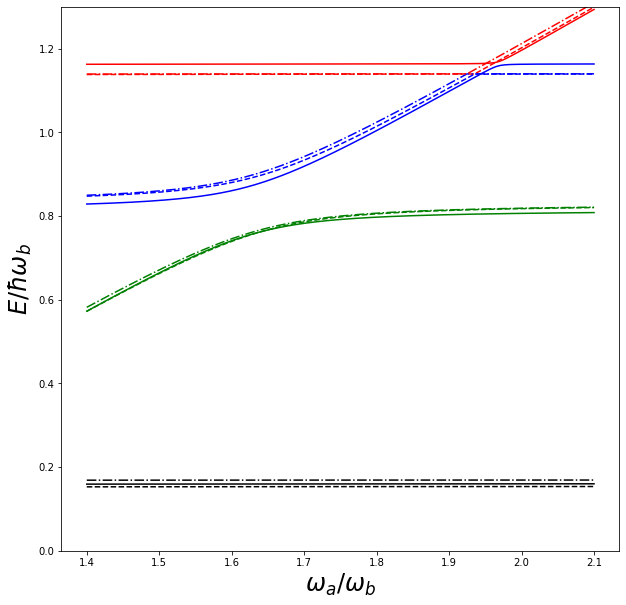

In [58]:
from numpy import size


choice_to_linestyle = {"general":"solid", "rabi":"dashed", "jc":"dashdot"}
eigenstate_index_to_color = {1:"black", 2:"green", 3:"blue", 4:"red"}
eigenstate_indices = eigenstate_index_to_color.keys() #eigenstate indices for 'H' corresponding to eigenstates |0, 1, g>, |1, 0, g>, |0, 0, e>, |0, 2, g> of 'H_0' 
plt.figure(figsize=(10,10))
plt.ylim(0, 1.3)
plt.xlabel(r'$\omega_a / \omega_b$', size=24)
plt.ylabel(r'$E / \hbar \omega_b$', size=24)

def draw_plot():
    for choice_index, choice in enumerate(choices):
        for eigenstate_index in eigenstate_indices:
            #now all that's left is to beautify and plot the lines
            plt.plot(omega_a_values, eigenenergy_arr[choice_index, :, eigenstate_index]/omega_b,
            linestyle=choice_to_linestyle[choice],
            color=eigenstate_index_to_color[eigenstate_index]
            )
draw_plot()

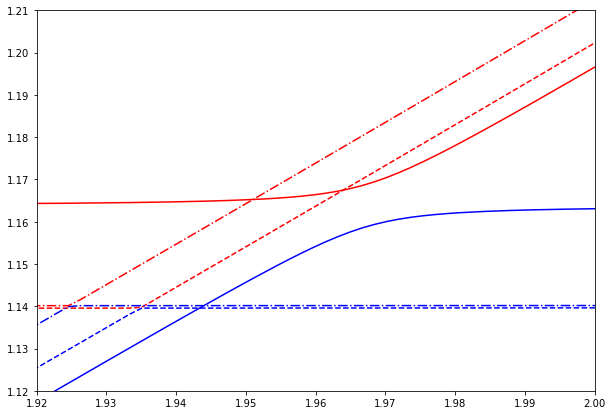

In [59]:
#zoomed in plot
plt.figure(figsize=(10,7))
plt.ylim(1.12, 1.21)
plt.xlim(1.92, 2.00)
draw_plot() #this plot has slight differences from the original one, don't know why